$$\Large \color{blue}{\textbf{A Simple Illustration of overfitting underfitting}}$$

$$\small \color{green}{\textbf{Written and Coded by}}$$
$$\large \color{green}{\textbf{Phuong Van Nguyen}}$$
$$\small \color{red}{\textbf{ phuong.nguyen@summer.barcelonagse.eu}}$$

# What is Overfitting and Underfitting?

## Underfit model
Underfitting refers to a model that cannot learn the training dataset. 

## Overfit model

Overfitting refers to a model that has learned the training dataset too well, including the statistical noise or random fluctuations in the training dataset. 

The problem with overfitting, is that the more specialized the model becomes to training data, the less well it is able to generalize to new data, resulting in an increase in generalization error. This increase in generalization error can be measured by the performance of the model on the validation dataset.


## Good Fit model

A good fit is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values.



# An Empirical Illustration

## Loading Lib

In [80]:
from timeit import default_timer as timer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
Purple= '\033[95m'
Cyan= '\033[96m'
Darkcyan= '\033[36m'
Blue = '\033[94m'
Green = '\033[92m'
Yellow = '\033[93m'
Red = '\033[91m'
Bold = "\033[1m"
Reset = "\033[0;0m"
Underline= '\033[4m'
End = '\033[0m'

## Creating a artificial data

In [100]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X_train = np.sort(np.random.rand(n_samples))
y_train = true_fun(X_train) + np.random.randn(n_samples) * 0.1
X_test  = np.linspace(0, 1, 100)
y_test  = true_fun(X_test)

## Defining algorithms

In [45]:
polynomial_features_1 = PolynomialFeatures(degree=1,
                                             include_bias=False)
polynomial_features_4 = PolynomialFeatures(degree=4,
                                             include_bias=False)
polynomial_features_15 = PolynomialFeatures(degree=15,
                                             include_bias=False)

pipelines =[]
pipelines.append(('polynomial_features_1',
                  Pipeline([("polynomial_features_1", polynomial_features_1),
                    ("linear_regression", LinearRegression())]))) 
pipelines.append(('polynomial_features_4',
                  Pipeline([("polynomial_features_4", polynomial_features_4),
                    ("linear_regression", LinearRegression())]))) 
pipelines.append(('polynomial_features_15',
                  Pipeline([("polynomial_features_15", polynomial_features_15),
                    ("linear_regression", LinearRegression())]))) 

## Model evaluation

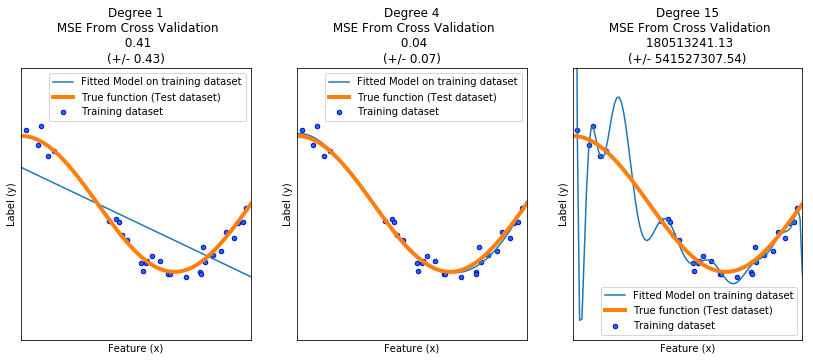

In [105]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train[:, np.newaxis], y_train)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X_train[:, np.newaxis], y_train,
                             scoring="neg_mean_squared_error", cv=10)

    #X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]),
             linestyle='-' , label="Fitted Model on training dataset")
    plt.plot(X_test, y_test, 
             lw=4,label='True function (Test dataset)')# "True function")
    plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Training dataset")
    plt.xlabel("Feature (x)")
    plt.ylabel("Label (y)")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\n MSE From Cross Validation\n {:.2f}\n(+/- {:.2f})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

1. $\textbf{Underfitting}$: One can see clearly that a simple model with a linear regression algorithm or 1-degree polynomial setting suffers from underfitting. This is because its fitted values are far from the actual values on the training data. The problem of underfitting implies that this model suffers from high bias and low variance. 

2. $\textbf{Overfitting}$: Conversely, a complex model with the 15-degree polynomial regression algorithm suffers from overfitting. Indeed, the fitted values generated from this complex model are identical to all actual values on the training data. However, its shape significantly differs from the shape of the true model. The problem of overfitting implies that this complex model suffers from low bias and high variance. 

3. $\textbf{Good fitting}$: However, the model with the 4-degree polynomial regression algorithm is the best fit. This is because its fitted values are identical to all actual values on the training dataset and its shape overlays the shape of the true model.